In [1]:
#lesson 5, using Kaggle Cats and Dogs Dataset
import os
import cv2
import numpy as np
from tqdm import tqdm 

In [4]:
#testing tqdm 
count = 0
for i in tqdm(range(1000000)):#increase the rage to 
     count+=i
print(count)

100%|████████████████████████████| 1000000/1000000 [00:01<00:00, 981298.20it/s]

499999500000


In [5]:
# set to true to one once, then back to false unless you want to change something in your training data.
#REBUILD_DATA = True 
REBUILD_DATA = False 

In [6]:
class DogsVSCats():
    IMG_SIZE = 50 #constant sixe of pizel 
    CATS = "kagglecatsanddogs_3367a/PetImages/Cat" #location of the cat folder, 
    DOGS = "kagglecatsanddogs_3367a/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1} #cats are zero and dogs ar
    training_data = [] #populate the training data
    
    catcount = 0 
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS: #iterating through the labeles
            print(label)
            for f in tqdm(os.listdir(label)): #iterating through all the files in the directory
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #converting to gray scale and loadgin the image
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE)) #resizing the image
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])
                        
                        if label == self.CATS:
                            self.catcount += 1 #counting number of cats
                        elif label == self.DOGS:
                            self.dogcount += 1 #counting number of dogs
                            
                    except Exception as e: # for error handling
                        #print(label, f, str(e))
                        pass
                        
        np.random.shuffle(self.training_data) #randomized data
        np.save("training_data.npy", self.training_data) #saving the data
        print('Cats:',dogsvcats.catcount) #total number of cats
        print('Dogs:',dogsvcats.dogcount) #notal number of dogs
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [7]:
np.eye(5) #nxn matrix with 1 in the diagonal


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [8]:
np.eye(5)[3] #prints the fourth row

array([0., 0., 0., 1., 0.])

In [9]:
training_data = np.load("training_data.npy", allow_pickle=True) #getting the stored data
print(len(training_data)) #total number of data

24946


In [10]:
print(training_data[1]) #showing the nth data

[array([[165, 165, 166, ..., 237, 233, 234],
       [165, 164, 164, ..., 238, 233, 232],
       [166, 164, 165, ..., 240, 234, 227],
       ...,
       [ 83,  92,  98, ..., 104,  96,  95],
       [ 92, 101, 104, ...,  95, 102,  88],
       [ 95, 104, 104, ..., 100,  98,  94]], dtype=uint8)
 array([0., 1.])]


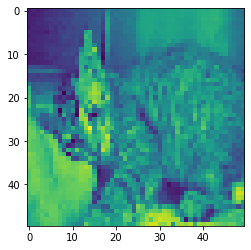

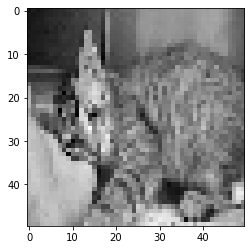

array([1., 0.])

In [16]:
#peeking at the training data
import matplotlib.pyplot as plt

plt.imshow(training_data[2][0]) #prints the default
plt.show()

plt.imshow(training_data[2][0], cmap="gray")
plt.show()
training_data[2][1] #prints the classification, 0=cat, 1=dog

In [17]:
#lessong 6 starts here .............................

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # three 2D convulational layer
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50) # -1, is for as many images, 1x50x50 is the data
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        
        #print(x[0].shape) #shape of the flattened size

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2] #coming with three values
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x)) #rectify linear
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1) #x is a batch of x-s, gives actual probability


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [11]:
#Next, we're ready to actually train the model, so we need to make a training loop
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) #adam optimizer is used
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50) #storing the image
X = X/255.0 #scaling the image value between 0 and 1
y = torch.Tensor([i[1] for i in training_data]) # storing the calssifications, 

VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT) #number of data reserved for testing. Using int so that the variable can be used to slice the data
print(val_size) 
print(len(training_data)) #total number of data

2494
24946


In [12]:
#slicing data
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]
print(len(train_X), len(test_X))

22452 2494


In [13]:
#this is th training, this takes longggggggggg time

BATCH_SIZE = 100 #determined by the memory size, may be set to 100
EPOCHS = 15 #number of times to train

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad() #net is the name of our model. zeroing the gradient

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")
    
    #checking accuracy after each EPOCH
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]) #argmax returns the indices of the max element of the array
            net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1
    print(f"Epoch: {epoch}. Loss: {loss}","Accuracy: ", round(correct/total, 4))

  0%|                                         | 2/2494 [00:00<02:25, 17.09it/s]

Epoch: 0. Loss: 0.2079353630542755


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 0. Loss: 0.2079353630542755 Accuracy:  0.6423


  0%|                                         | 2/2494 [00:00<02:10, 19.05it/s]

Epoch: 1. Loss: 0.17909462749958038


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 1. Loss: 0.17909462749958038 Accuracy:  0.7037


  0%|                                         | 4/2494 [00:00<01:13, 33.90it/s]

Epoch: 2. Loss: 0.15932506322860718


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 2. Loss: 0.15932506322860718 Accuracy:  0.7458


  0%|                                         | 4/2494 [00:00<01:12, 34.19it/s]

Epoch: 3. Loss: 0.13563662767410278


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 3. Loss: 0.13563662767410278 Accuracy:  0.7578


  0%|                                         | 3/2494 [00:00<01:23, 30.00it/s]

Epoch: 4. Loss: 0.11279396712779999


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 4. Loss: 0.11279396712779999 Accuracy:  0.7554


  0%|                                         | 4/2494 [00:00<01:14, 33.61it/s]

Epoch: 5. Loss: 0.09059657156467438


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 5. Loss: 0.09059657156467438 Accuracy:  0.7654


  0%|                                         | 4/2494 [00:00<01:14, 33.33it/s]

Epoch: 6. Loss: 0.08286631107330322


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 6. Loss: 0.08286631107330322 Accuracy:  0.7602


  0%|                                         | 4/2494 [00:00<01:12, 34.48it/s]

Epoch: 7. Loss: 0.05682367831468582


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 7. Loss: 0.05682367831468582 Accuracy:  0.7478


  0%|                                         | 4/2494 [00:00<01:19, 31.49it/s]

Epoch: 8. Loss: 0.03787587210536003


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 8. Loss: 0.03787587210536003 Accuracy:  0.7554


  0%|                                         | 4/2494 [00:00<01:12, 34.19it/s]

Epoch: 9. Loss: 0.03628109022974968


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 9. Loss: 0.03628109022974968 Accuracy:  0.7614


  0%|                                         | 4/2494 [00:00<01:14, 33.61it/s]

Epoch: 10. Loss: 0.04952457919716835


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 10. Loss: 0.04952457919716835 Accuracy:  0.7666


  0%|                                         | 4/2494 [00:00<01:13, 33.90it/s]

Epoch: 11. Loss: 0.02912503480911255


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 11. Loss: 0.02912503480911255 Accuracy:  0.7719


  0%|                                         | 4/2494 [00:00<01:12, 34.48it/s]

Epoch: 12. Loss: 0.024392295628786087


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 12. Loss: 0.024392295628786087 Accuracy:  0.7638


  0%|                                         | 4/2494 [00:00<01:13, 33.90it/s]

Epoch: 13. Loss: 0.010102231055498123


  0%|                                                  | 0/225 [00:00<?, ?it/s]

Epoch: 13. Loss: 0.010102231055498123 Accuracy:  0.7686


  0%|                                         | 4/2494 [00:00<01:12, 34.48it/s]

Epoch: 14. Loss: 0.024145474657416344


100%|██████████████████████████████████████| 2494/2494 [01:16<00:00, 32.78it/s]

Epoch: 14. Loss: 0.024145474657416344 Accuracy:  0.7638


In [14]:
#
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i]) #argmax returns the indices of the max element of the array
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, 
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 4))

100%|██████████████████████████████████████| 2494/2494 [01:17<00:00, 32.16it/s]

Accuracy:  0.7638


In [27]:
# Specify a path
PATH = "state_dict_model_CatDog.pt"

# Save
torch.save(net.state_dict(), PATH)

In [16]:
net(test_X[8].view(-1, 1, 50, 50))[0] #testing out the nth element


tensor([0.0025, 0.9975], grad_fn=<SelectBackward>)

In [17]:
torch.argmax(net(test_X[8].view(-1, 1, 50, 50))[0])

tensor(1)

In [18]:
torch.argmax(test_y[8])

tensor(1)

In [18]:
# here we are loading the trained model
PATH = "state_dict_model_CatDog.pt" # same file name that was saved

model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

torch.Size([1, 1, 50, 50])


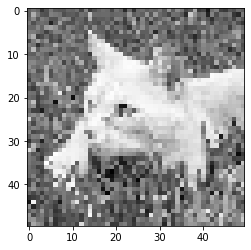

In [27]:
#now testing an image outside of the data set
CATEGORIES = ["Cat", "Dog"]

def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap="gray")
    
    #plt.show()
    return new_array.reshape(-1, 1, IMG_SIZE, IMG_SIZE)

print(torch.Tensor(prepare('cat.jpg')).shape) #update the name of the file




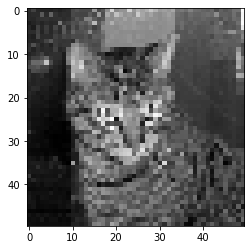

In [36]:
prediction = model(torch.Tensor(prepare('1.jpg'))) # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT

In [37]:
prediction

tensor([[1., 0.]], grad_fn=<SoftmaxBackward>)

In [38]:
torch.argmax(prediction)

tensor(0)

In [39]:
print(CATEGORIES[torch.argmax(prediction)])

Cat


In [26]:
print(f"Epoch: {epoch}. Loss: {loss}","Accuracy: ", round(correct/total, 4))

Epoch: 14. Loss: 0.024145474657416344 Accuracy:  0.7638
